In [1]:
import pandas as pd

In [ ]:
Problem Statement
         Given the plot of a movie, predict the genre of the movie.


In [2]:
df = pd.read_csv("wiki_movie_plots_deduped.csv")

In [3]:
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [4]:
import sqlite3
con = sqlite3.connect('movie_plots.db')

Cleaning function

In [5]:
import re
def clean(s):
    s = s.replace(r'<lb>', "\n")
    s = s.replace(r'<tab>', "\i")
    s = re.sub(r'<br */*>', "\n", s)
    s = s.replace("&lt;", "<").replace("&gt;", ">").replace("&amp;", "&")
    s = s.replace("&amp;", "&")
    # markdown urls
    s = re.sub(r'\(https*://[^\)]*\)', "", s)
    # normal urls
    s = re.sub(r'https*://[^\s]*', "", s)
    s = re.sub(r'_+', ' ', s)
    s = re.sub(r'"+', '"', s)
    return str(s)

In [6]:
num_rows = len(df)
num_rows

34886

In [7]:
df = df[:5000]

In [8]:
df["plot_clean"] = ''

In [9]:
col_types = df.dtypes
col_types

Release Year         int64
Title               object
Origin/Ethnicity    object
Director            object
Cast                object
Genre               object
Wiki Page           object
Plot                object
plot_clean          object
dtype: object

In [10]:
for i, row in df.iterrows():
    df.at[i, "plot_clean"] = clean(row.Plot)

In [11]:
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,plot_clean
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...","A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...","The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...","The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,The earliest known adaptation of the classic f...


NLP

Load spacy

In [12]:
import spacy 
nlp = spacy.load("en_core_web_sm")

Perform NLP on the dataset

In [13]:
for i, row in df.iterrows():
    if i % 1000 == 0:
        print(i)
    if(row["plot_clean"] and len(str(row["plot_clean"])) < 1000000):
        doc = nlp(str(row["plot_clean"]))
        adjectives = []
        nouns = []
        verbs = []
        lemmas = []

        for token in doc:
            lemmas.append(token.lemma_)
            if token.pos_ == "ADJ":
                adjectives.append(token.lemma_)
            if token.pos_ == "NOUN" or token.pos_ == "PROPN":
                nouns.append(token.lemma_)
            if token.pos_ == "VERB":
                verbs.append(token.lemma_)
                
        df.at[i, "plot_lemma"] = " ".join(lemmas)                
        df.at[i, "plot_nouns"] = " ".join(nouns)
        df.at[i, "plot_adjectives"] = " ".join(adjectives)
        df.at[i, "plot_verbs"] = " ".join(verbs)
        df.at[i, "plot_nav"] = " ".join(nouns+adjectives+verbs)
        df.at[i, "no_tokens"] = len(lemmas)

0
1000
2000
3000
4000


In [14]:
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,plot_clean,plot_lemma,plot_nouns,plot_adjectives,plot_verbs,plot_nav,no_tokens
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...","A bartender is working at a saloon, serving dr...","a bartender be work at a saloon , serve drink ...",bartender drink customer man bucket beer Carri...,saloon irish irish,work serve fill burst assault pull dump begin ...,bartender drink customer man bucket beer Carri...,96.0
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...","The moon, painted with a smiling face hangs ov...","the moon , paint with a smile face hang over a...",moon face park night couple fence learn railin...,young big last well,paint smile hang walk look smile embrace get s...,moon face park night couple fence learn railin...,99.0
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...","The film, just over a minute long, is composed...","the film , just over a minute long , be compos...",film minute shot girl base altar tomb face cam...,first portal second long,compose sit hide view run,film minute shot girl base altar tomb face cam...,94.0
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,Lasting just 61 seconds and consisting of two ...,"last just 61 second and consist of two shot , ...",second shot shot wood winter actor vice - pres...,first other common second different,last consist set represent hurry fall right co...,second shot shot wood winter actor vice - pres...,183.0
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,The earliest known adaptation of the classic f...,the early know adaptation of the classic fairy...,adaptation fairytale film Jack cow bean mother...,early classic deposed giant able,know show trade force drop force sleep visit s...,adaptation fairytale film Jack cow bean mother...,157.0


Save to database

In [15]:
df.to_sql('plot_nlp', con)

5000

In [16]:
# filter warnings on depreciation etc.
import warnings
warnings.filterwarnings("ignore")

Library import & Settings

In [17]:
# import pandas, numpy
import pandas as pd
import numpy as np

# adjust pandas display
pd.options.display.max_columns = 30
pd.options.display.max_rows = 100
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.precision = 2
pd.options.display.max_colwidth = -1

In [18]:
# Import matplotlib and seaborn and adjust some defaults
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 100

import seaborn as sns
sns.set_style("whitegrid")

Basic Properties of the dataset

In [20]:
df.dtypes

Release Year        int64  
Title               object 
Origin/Ethnicity    object 
Director            object 
Cast                object 
Genre               object 
Wiki Page           object 
Plot                object 
plot_clean          object 
plot_lemma          object 
plot_nouns          object 
plot_adjectives     object 
plot_verbs          object 
plot_nav            object 
no_tokens           float64
dtype: object

In [23]:
# select a sample of some data frame columns
df[['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast', 'Genre']] \
  .sample(4, random_state=42)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre
1501,1933,Ex-Lady,American,Robert Florey,"Bette Davis, Gene Raymond, Claire Dodd",comedy
2586,1939,The Hound of the Baskervilles,American,Sidney Lanfield,"Basil Rathbone, Nigel Bruce, Richard Greene",mystery
2653,1939,Raffles,American,Sam Wood,"David Niven, Olivia De Havilland",crime comedy
1055,1931,24 Hours,American,Marion Gering,"Kay Francis, Miriam Hopkins, Regis Toomey",drama


In [24]:
len(df)

5000

In [26]:
df.count()

Release Year        5000
Title               5000
Origin/Ethnicity    5000
Director            5000
Cast                4895
Genre               5000
Wiki Page           5000
Plot                5000
plot_clean          5000
plot_lemma          5000
plot_nouns          5000
plot_adjectives     5000
plot_verbs          5000
plot_nav            5000
no_tokens           5000
dtype: int64

In [27]:
# size info, including memory consumption
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Release Year      5000 non-null   int64  
 1   Title             5000 non-null   object 
 2   Origin/Ethnicity  5000 non-null   object 
 3   Director          5000 non-null   object 
 4   Cast              4895 non-null   object 
 5   Genre             5000 non-null   object 
 6   Wiki Page         5000 non-null   object 
 7   Plot              5000 non-null   object 
 8   plot_clean        5000 non-null   object 
 9   plot_lemma        5000 non-null   object 
 10  plot_nouns        5000 non-null   object 
 11  plot_adjectives   5000 non-null   object 
 12  plot_verbs        5000 non-null   object 
 13  plot_nav          5000 non-null   object 
 14  no_tokens         5000 non-null   float64
dtypes: float64(1), int64(1), object(13)
memory usage: 52.8 MB


 Exploring Column Summaries

In [ ]:
Summary for Categorical Features

In [28]:
columns = [col for col in df.columns if not col.startswith('plot')]
columns

['Release Year',
 'Title',
 'Origin/Ethnicity',
 'Director',
 'Cast',
 'Genre',
 'Wiki Page',
 'Plot',
 'no_tokens']

In [30]:
# describe categorical columns of type np.object 
df[columns] \
  .describe(include=np.object) \
  .transpose()

,count,unique,top,freq
Title,5000,4821,Dr. Jekyll and Mr. Hyde,5
Origin/Ethnicity,5000,1,American,5000
Director,5000,889,Unknown,71
Cast,4895,4515,The Three Stooges,33
Genre,5000,227,drama,1207
Wiki Page,5000,4977,https://en.wikipedia.org/wiki/The_Thirteenth_Chair,2
Plot,5000,4973,"Pop Webster is a former silent movie star once known as ""Bronco Billy"" who now works as the guard on the main gate at Paramount Pictures. However, he's told his son Johnny, who's in the Navy, that he's the studio's Executive Vice President in Charge of Production. When Johnny shows up in Hollywood on shore leave, Pop and the studio's switchboard operator, Polly Judson, go all-out to maintain the illusion for Johnny and his sailor friends that Pop's a studio big-wig. Things get a bit complicated when Pop offers to put on a variety show for the Navy, featuring all of Paramount's stars, but Polly convinces Bob Hope and Bing Crosby to do the show, and they convince the rest of the stars on the lot.[3][4][5]",2


In [31]:
df['Genre'].value_counts()[:10]

drama              1207
comedy             908 
western            289 
musical            196 
mystery            180 
film noir          153 
adventure          142 
crime              125 
romantic comedy    102 
musical comedy     99  
Name: Genre, dtype: int64

Exploring Text Categories

Normalize column names

In [32]:
df.columns = df.columns.str.lower()  # 
df.columns = df.columns.str.replace(' ', '_')  
df.columns = df.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True) 

In [33]:
df.columns

Index(['release_year', 'title', 'originethnicity', 'director', 'cast', 'genre',
       'wiki_page', 'plot', 'plot_clean', 'plot_lemma', 'plot_nouns',
       'plot_adjectives', 'plot_verbs', 'plot_nav', 'no_tokens'],
      dtype='object')

In [34]:
df['genre'].nunique()

227

In [ ]:
Exploring Word Frequencies

In [36]:
# create a data frame slice
sub_df = df[df['genre']=='western']
# sample cleaned text and tokens tagged as nouns
sub_df[['plot_clean', 'plot_nouns']].sample(2)

plot_clean  \
3227  While surveying a telegraph line in 1861, Western Union engineer Edward Creighton (Dean Jagger) is severely injured in an accident. He is discovered by Vance Shaw (Randolph Scott), an outlaw on the run from a posse. Forced to travel on foot after his horse was hurt, Shaw at first considers stealing Creighton's horse, but changes his mind and takes the man with him, saving his life.\r\nSometime later, following his recovery, Creighton returns to Omaha, Nebraska and plans the construction of a telegraph line from Omaha to Salt Lake City, Utah. Facing considerable opposition to the line from Confederate soldiers, Indians, and outlaws, Creighton elicits the help of his sister Sue (Virginia Gilmore), foreman Pat Grogan (Minor Watson), and assistant Homer Kettle (Chill Wills).\r\nLooking to put his outlaw past behind him, Shaw arrives at Creighton's Western Union office looking for honest work and is hired as a scout by Grogan who is unaware of his past. Creighton recognizes him among the men and allows him to stay despite his suspicions. Creighton also hires tenderfoot Richard Blake (Robert Young), a Harvard-educated engineer as a favor to Blake's father. Shaw and Blake are both attracted to Sue and vie for her attention, but their romantic rivalry is cut short when construction of the telegraph line starts on July 4, 1861.\r\nAfter work commences on the line, one of the men is killed apparently by a mysterious band of cattle-rustling Indians. Unconvinced that Indians are to blame, Shaw rides out to investigate and follows the rustlers' trail to the camp of Jack Slade, a former friend and cohort, whose gang committed the killing disguised as Indians—the gang Shaw left following his last bank robbery. Slade reveals that they are working for the Confederacy to disrupt Western Union because they believe the telegraph service will help the Union. Shaw rides away and returns to the line. Not wanting to turn in his former friends, Shaw tells Creighton that a large band of Dakota Indians stole the cattle, and recommends that they simply replace the herd and not risk a fight with the Indians.\r\nSometime later, a confrontation takes place between men working on the forward line and a band of drunken Indians. When one of the Indians tries to steal some equipment, a nervous Blake shoots him, ignoring Shaw's order to remain calm. After word arrives that the main camp is under attack by other Indians, the Western Union men rush back to help with the defense. At the main camp, Slade's men, who are again disguised as Indians, steal the Western Union horses. The company discover the ruse when one of the wounded Indians turns out to be a white man. Forced to buy back their stolen horses from Slade, Creighton becomes suspicious of Shaw's involvement, especially when he admits to knowing the gang.\r\nSoon the U.S. Army arrives and announces the Indians have now refused to allow the telegraph lines to go through their territory in response to Blake's shooting of the drunken Indian. Creighton, Shaw, and Blake ride out to convince Chief Spotted Horse to allow them to build the line through Indian territory, even though the man Blake wounded was Spotted Horse's son. Creighton is finally able to persuade the Indians to allow them passage, and work continues until the company approaches Salt Lake City.\r\nSometime later, Shaw receives word that Jack Slade wants to meet with him. On the way to see Slade, Shaw is captured and bound by Slade's men. Slade says his group is going to burn down the Western Union camp and they don't want Shaw to interfere. After Slade and his men ride off, Shaw escapes from his ropes (using the smoldering embers of Slade's campfire),but returns too late to prevent the fire. He helps rescue some of the Western Union men from the flames and burns his hands in the process (or so he lets everyone believe as he burnt them in the campfire).\r\nAfter the fire, Creighton confronts Shaw for an explanation, but Shaw doe

Creating a list of tokens from a list of documents

In [39]:
def my_tokenizer(text):
    return text.split() if text != None else []

In [40]:
# transform list of documents into a single list of tokens
tokens = sub_df.plot_nouns.map(my_tokenizer).sum()

In [41]:
print(tokens[:200])

['film', 'bandit', 'railroad', 'telegraph', 'office', 'operator', 'gunpoint', 'train', 'order', 'engineer', 'locomotive', 'tender', 'station', 'water', 'tank', 'operator', 'train', 'bandit', 'car', 'messenger', 'box', 'valuable', 'dynamite', 'other', 'fireman', 'engineer', 'train', 'locomotive', 'bandit', 'passenger', 'train', 'belonging', 'passenger', 'loot', 'bandit', 'valley', 'horse', 'telegraph', 'office', 'operator', 'awaken', 'daughter', 'meal', 'consciousness', 'water', 'relief', 'dance', 'hall', 'stranger', 'local', 'foot', 'door', 'telegraph', 'operator', 'robbery', 'man', 'posse', 'bandit', 'shootout', 'mail', 'film', 'town', 'border', 'poker', 'game', 'saloon', 'player', 'player', 'Mexican', 'Pedro', 'uproar', 'Pedro', 'saloon', 'sheriff', 'Pedro', 'home', 'Pedro', 'sherriff', 'Pedro', 'wife', 'Juanita', 'suspicion', 'sheriff', 'Pedro', 'town', 'jail', 'head', 'border', 'posse', 'border', 'Juanita', 'film', 'Pedro', 'town', 'Kincaid', 'La', 'Reno', 'land', 'force', 'Espinoz

Counting Frequencies with a Counter

In [42]:
from collections import Counter

counter = Counter(tokens)
counter.most_common(20)

[('man', 312),
 ('Gene', 300),
 ('town', 252),
 ('ranch', 201),
 ('gang', 153),
 ('father', 128),
 ('cattle', 127),
 ('John', 112),
 ('horse', 109),
 ('friend', 107),
 ('Jim', 104),
 ('Bill', 97),
 ('money', 93),
 ('sheriff', 91),
 ('brother', 86),
 ('love', 85),
 ('gold', 83),
 ('Martin', 79),
 ('land', 77),
 ('gun', 77)]

In [43]:
df.genre.unique()

array(['unknown', 'western', 'comedy', 'short',
       'short action/crime western', 'short film', 'biographical',
       'drama', 'adventure', 'short fantasy', 'silent sports', 'horror',
       'crime', 'drama, horror', 'historical drama', 'fantasy drama',
       'biographical drama', 'documentary drama', 'fantasy',
       'adventure serial', 'epic', 'historical', 'comedy short',
       'comedy, western', 'biography', 'action adventure',
       'western drama', 'short comedy', 'comedy–drama', 'romantic drama',
       'mystery', 'crime drama', 'romance',
       'sexual hygiene/exploitation film', 'comedy drama', 'war drama',
       'spy', 'romantic comedy', 'propaganda', 'ww1 propaganda', 'biopic',
       'animated series', 'drama romance', 'melodrama', 'period drama',
       'swashbuckler', 'romance drama', 'drama, adventure',
       'crime comedy', 'documentary', 'comedy western', 'fantasy, family',
       'war', 'comedy, adventure', 'fantasy, adventure', 'thriller',
       'dramatic

In [44]:
print([t[0] for t in counter.most_common(200)])  

['man', 'Gene', 'town', 'ranch', 'gang', 'father', 'cattle', 'John', 'horse', 'friend', 'Jim', 'Bill', 'money', 'sheriff', 'brother', 'love', 'gold', 'Martin', 'land', 'gun', 'daughter', 'train', 'Billy', 'outlaw', 'way', 'owner', 'time', 'Roy', 'George', 'rancher', 'Tom', 'wagon', 'posse', 'day', 'Joe', 'life', 'hand', 'Kid', 'cowboy', 'year', 'stagecoach', 'Frog', 'order', 'City', 'robbery', 'mine', 'Autry', 'Rocklin', 'Doc', 'gene', 'plan', 'bank', 'Quirt', 'son', 'night', 'Tex', 'Dan', 'Indians', 'Gabby', 'woman', 'Harry', 'William', 'murder', 'job', 'James', 'death', 'girl', 'Mary', 'Bob', 'rustler', 'Red', 'law', 'help', 'marshal', 'Carter', 'Dunson', 'film', 'jail', 'Kansas', 'saloon', 'home', 'Henry', 'company', 'Steve', 'family', 'business', 'Jesse', 'Custer', 'line', 'Duke', 'Adam', 'Sheriff', 'Jack', 'farmer', 'fight', 'Charlie', 'car', 'herd', 'settler', 'Texas', 'henchman', 'Dave', 'head', 'crime', 'mother', 'Don', 'Jerry', 'bandit', 'water', 'Jane', 'Betty', 'area', 'Cali

In [45]:
from spacy.lang.en.stop_words import STOP_WORDS

def remove_stopwords(tokens):
    """Remove stopwords from a list of tokens."""
    return [t for t in tokens if t not in STOP_WORDS]

# rebuild counter
counter = Counter(remove_stopwords(tokens))

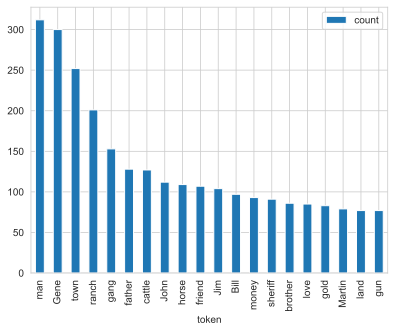

In [46]:
# convert list of tuples into data frame
freq_df = pd.DataFrame.from_records(counter.most_common(20),
                                    columns=['token', 'count'])

# create bar plot
freq_df.plot(kind='bar', x='token');

Using word Clouds

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

In [51]:
from wordcloud import WordCloud

def wordcloud(counter):
    """A small wordloud wrapper"""
    wc = WordCloud(width=1200, height=800, 
                   background_color="white", 
                   max_words=200) 
    wc.generate_from_frequencies(counter)

    # Plot
    fig=plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

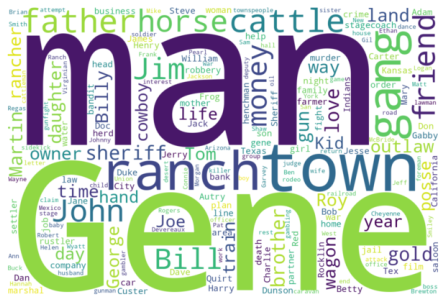

In [52]:
# create wordcloud
wordcloud(counter)

Comparing to Musical

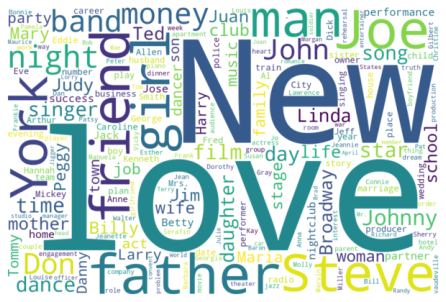

In [54]:
tokens2 = df[df['genre']=='musical'].plot_nouns \
         .map(my_tokenizer).sum()

counter2 = Counter(remove_stopwords(tokens2))
wordcloud(counter2)

Exploring Text Complexity

In [56]:
df['no_tokens'] = df.plot_lemma\
  .map(lambda l: 0 if l==None else len(l.split()))

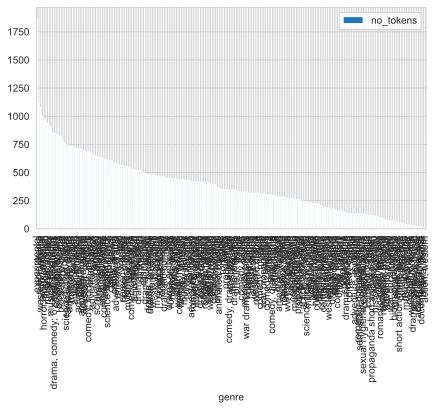

In [57]:
#mean number of tokens by category
df.groupby(['genre']) \
  .agg({'no_tokens':'mean'}) \
  .sort_values(by='no_tokens', ascending=False) \
  .plot(kind='bar', figsize=(7,4));

In [58]:
# render plots as retina or png, because svg is very slow
%config InlineBackend.figure_format = 'retina'

import seaborn as sns

def multi_boxplot(data, x, y, ylim = None):
    '''Wrapper for sns boxplot with cut-off functionality'''
    # plt.figure(figsize=(30, 5))
    fig, ax = plt.subplots()
    plt.xticks(rotation=90) 

    # order boxplots by median
    ordered_values = data.groupby(x)[[y]] \
                         .median() \
                         .sort_values(y, ascending=False) \
                         .index
        
    sns.boxplot(x=x, y=y, data=data, palette='Set2', 
                order=ordered_values)

    fig.set_size_inches(11, 6)
    
    # cut-off y-axis at value ylim
    ax.set_ylim(0, ylim)

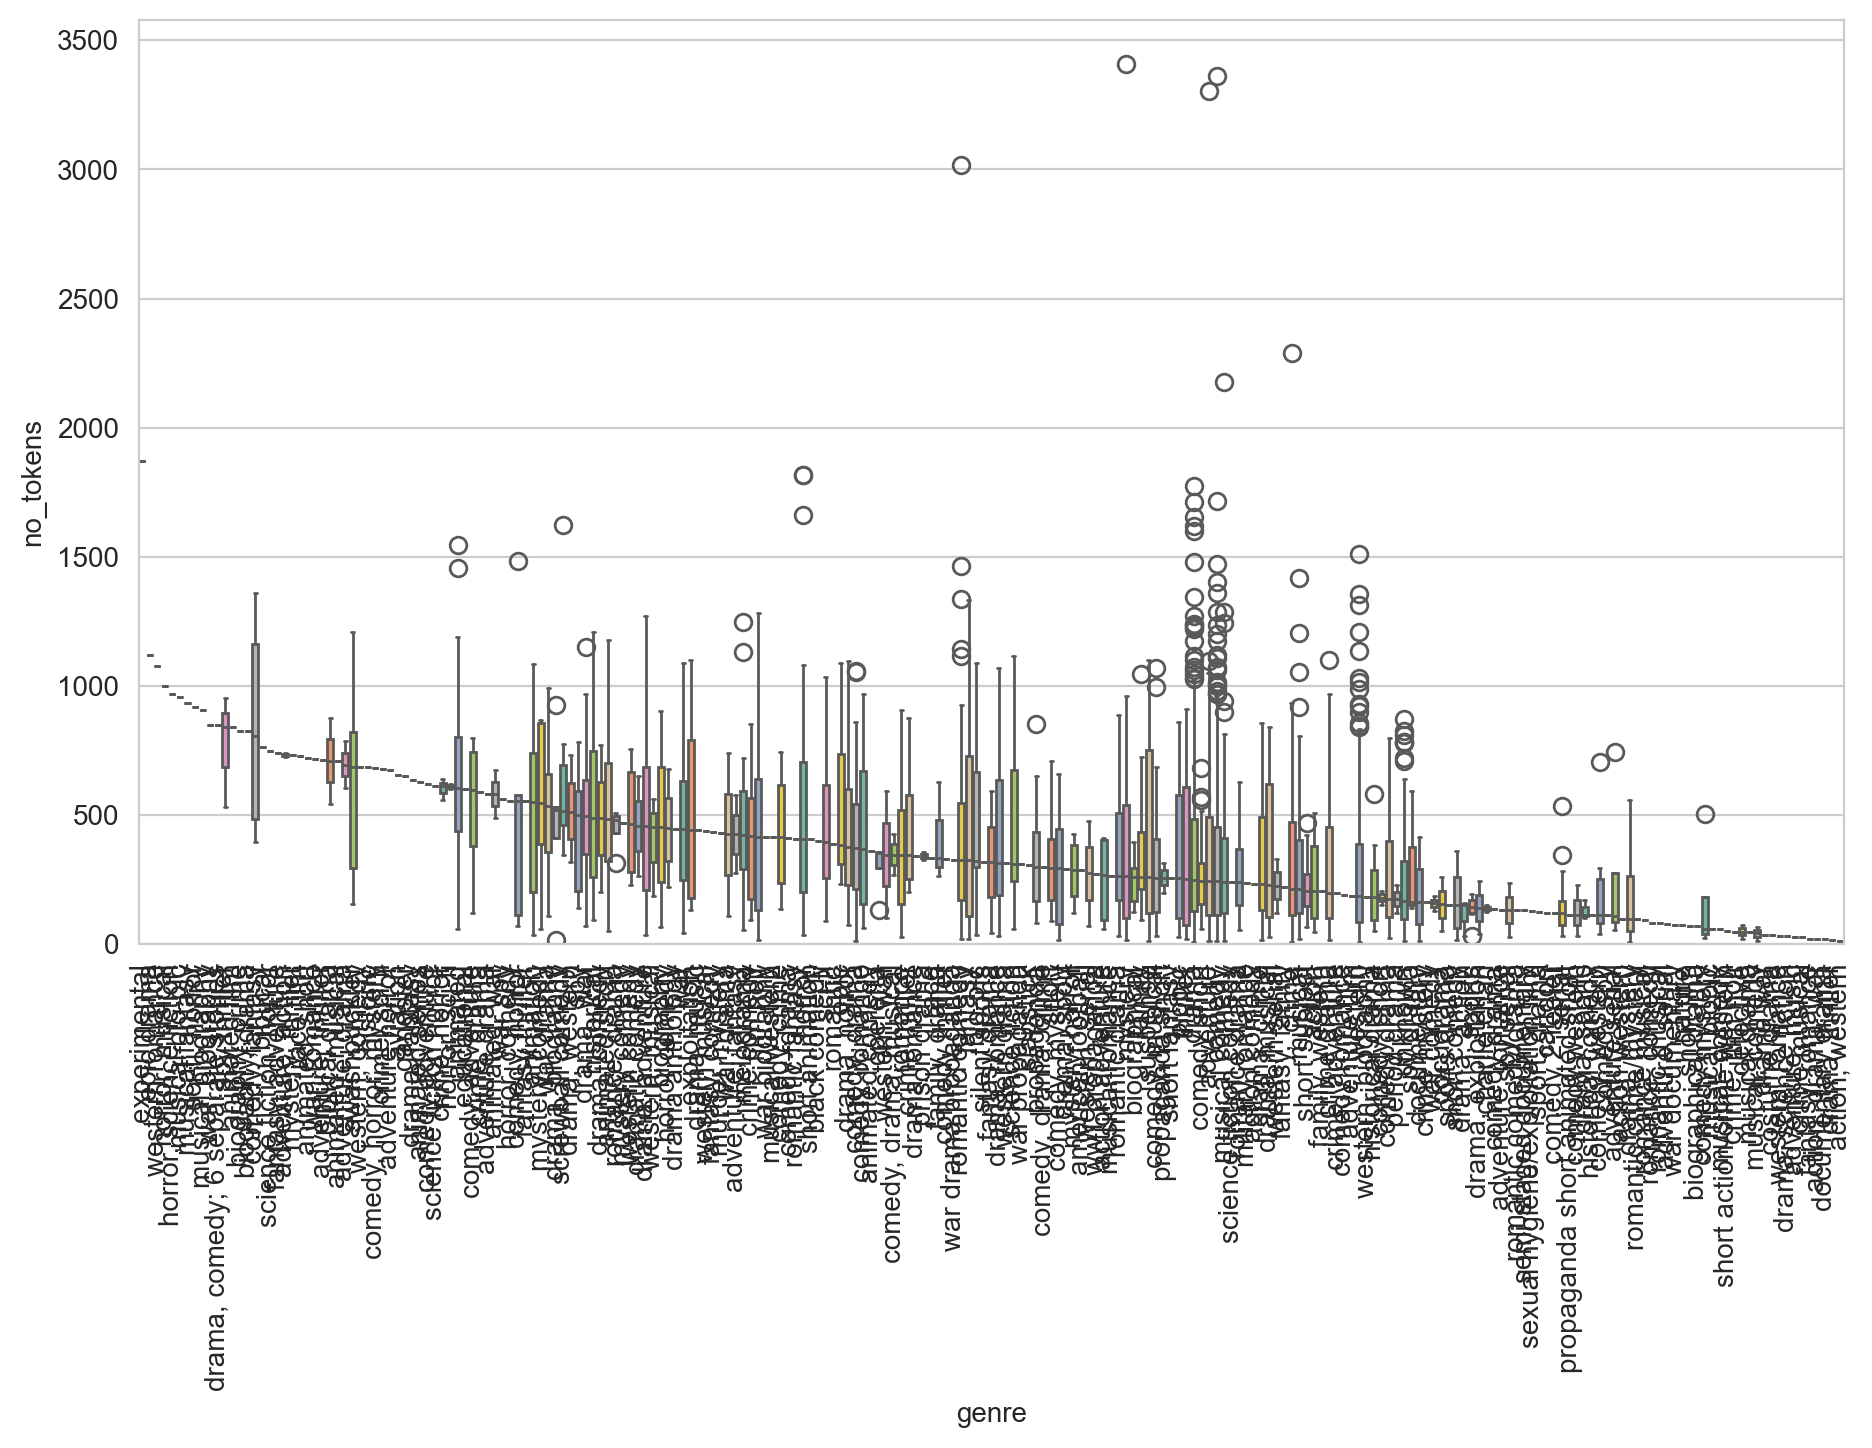

In [59]:
multi_boxplot(df, 'genre', 'no_tokens');

#print text of outliers


In [64]:
df['plot_lemma'][df.no_tokens > 2500]

1897    the front page of a brochure depict a globe with ribbon state " INTEROCEANIC FIRE INSURANCE CO . " and , underneath , " estd . 1872 " and , still below , " office in all PRINCIPAL CITIES " . turn to page 6 . , one see a photograph of a building describe above as " excelsior paper company " and below as " insure by Interoceanic Fire Insurance Co. " as a blaze inferno collapse the building in the photo , a policeman move away the onlooker and one of they ( Edmund Lowe ) take a few step aside to find a woman ( Ann Sothern ) , stand on a pile of crate , observe the fire . as he look up at she , she say , " I wonder how it start " . he respond by provide a bantering discourse on " two hundred and two way of start a fire " , illustrate it by strike a match on his tooth . he then offer she a cigarette , then invite she for a beer ( " nice cold beer be very nice after a hot fire " ) , then " some food " and , finally , " a little stroll through the park " . she refuse all offer ( " you

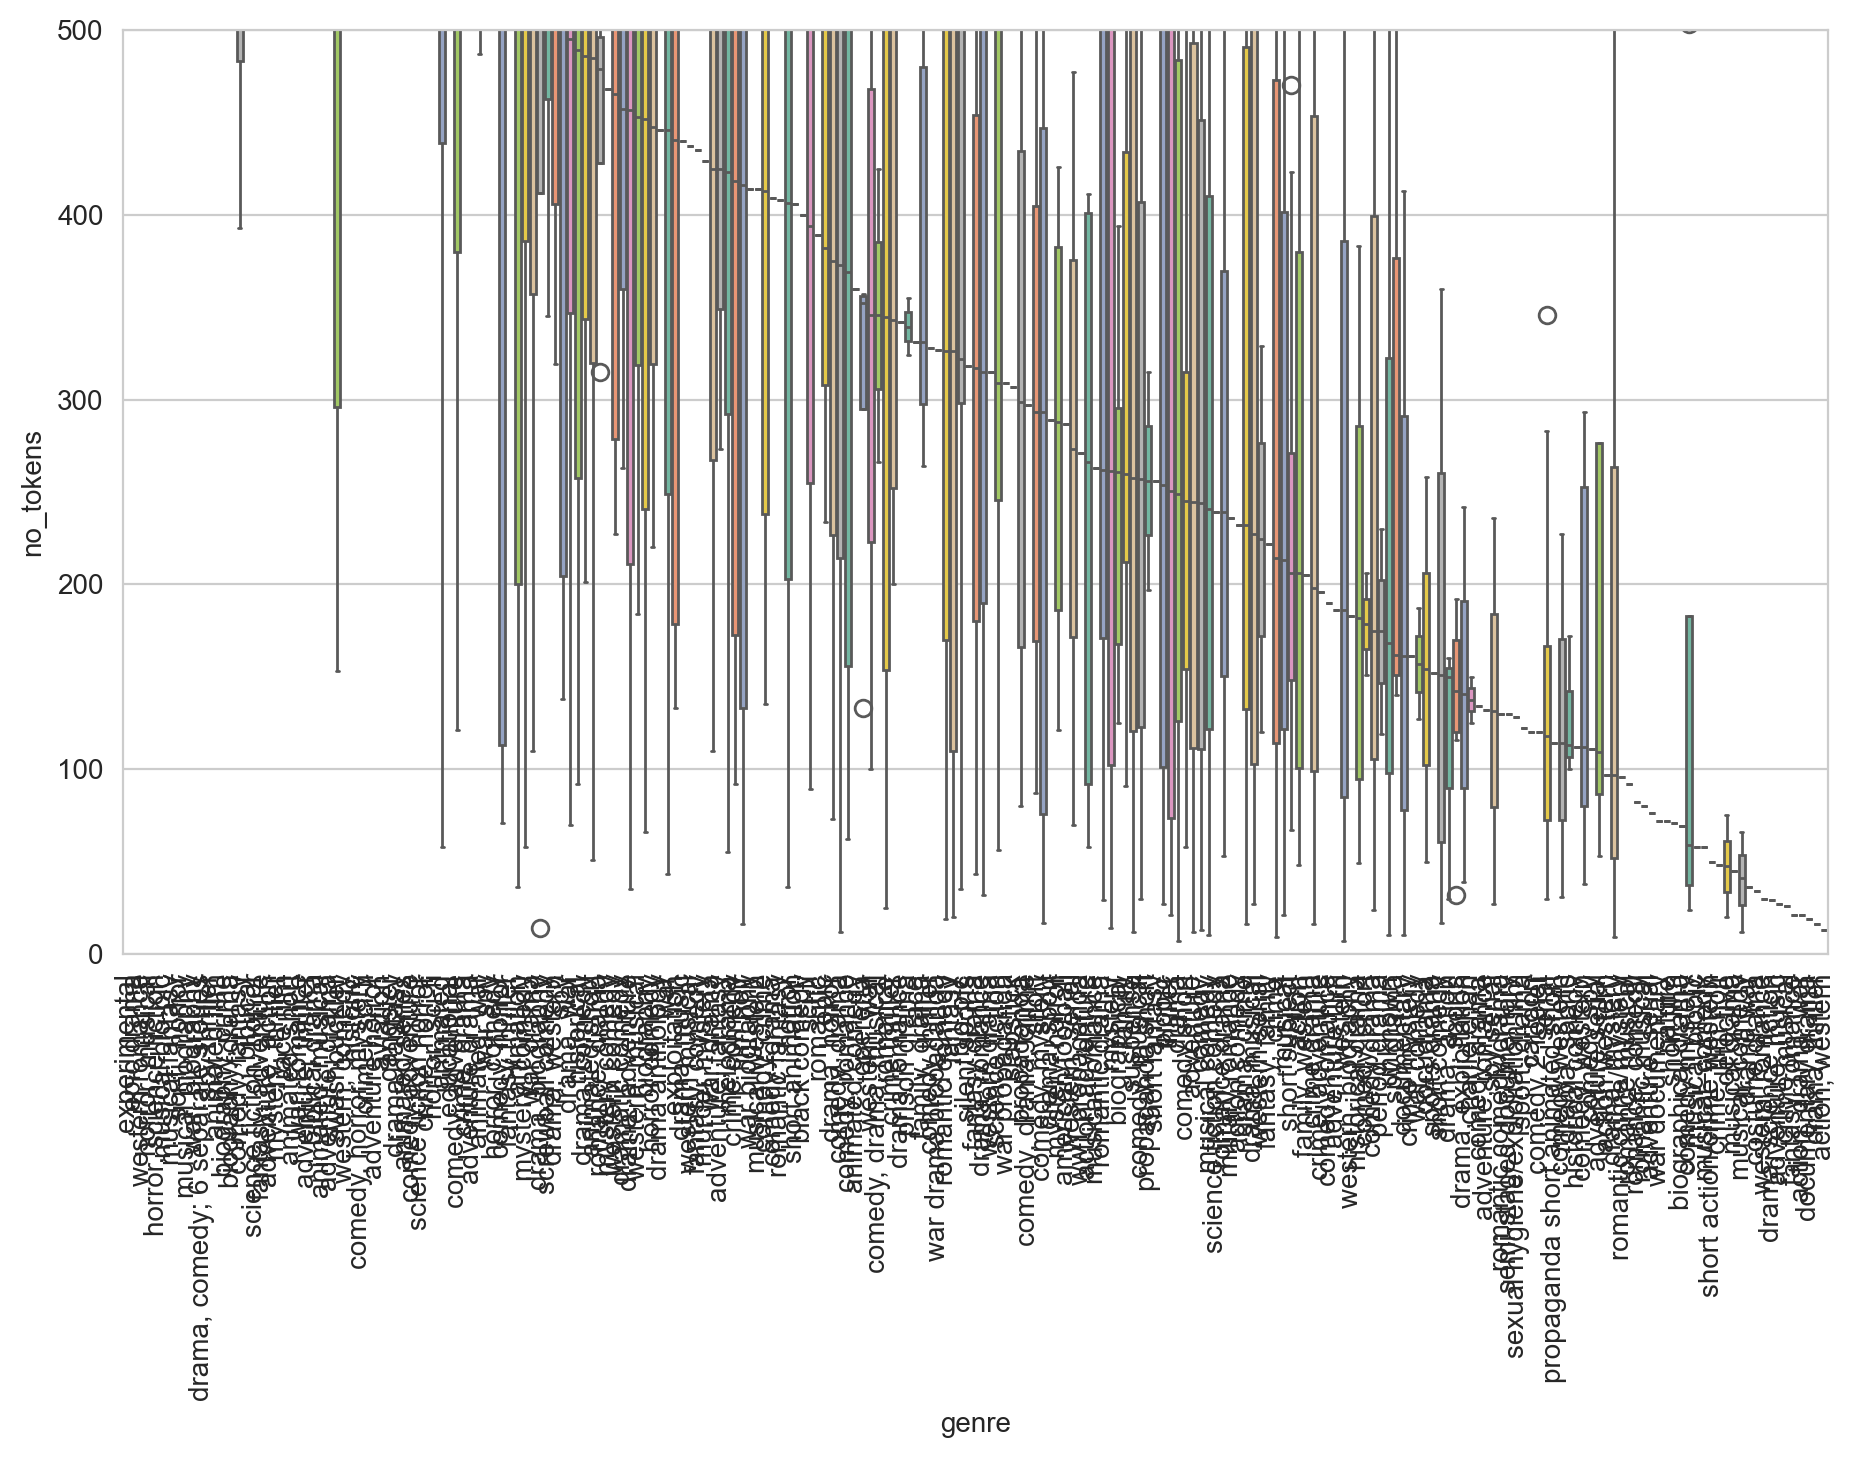

In [68]:
# cut-off diagram at y=500
multi_boxplot(df, 'genre', 'no_tokens', ylim=500)

In [ ]:
# comparing subreddits within a single category
multi_boxplot(df[df.genre=='comedy'], 
              'plot_nouns', 'no_tokens', ylim=700)